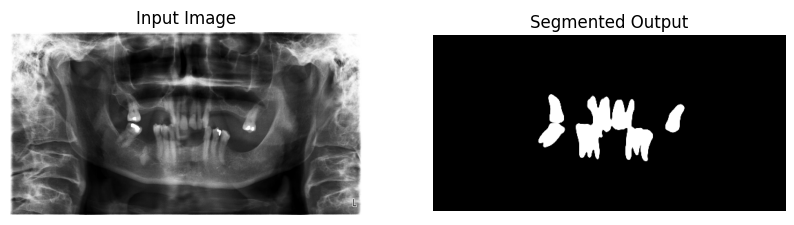

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import albumentations as A

import cv2
from albumentations.pytorch import ToTensorV2

from training import DentalModel

device = "cuda" if torch.cuda.is_available() else "cpu"

simple_transform = A.Compose([
    A.Resize(height=256, width=512),  # Resize to 256x512
    A.Normalize(mean=(0.0, 0.0, 0.0), std=(1.0, 1.0, 1.0)),  # Normalize image to 0-1 range
    ToTensorV2()
])

image_path = 'data/Radiographs/100.JPG'

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
augmented = simple_transform(image=image)
augmented = augmented['image'].unsqueeze(0)

arch = "unetplusplus"
encoder_name = "resnet34"
path = "tensorboards/unetplusplus-resnet34/version_0/checkpoints/best_checkpoint.ckpt"
model = DentalModel.load_from_checkpoint(path, arch=arch, encoder_name=encoder_name, in_channels=3, out_classes=1)

model.to(device)

model.eval()
with torch.inference_mode():
    output = model(augmented.to(device))
    output = torch.sigmoid(output)
    output = output.squeeze().cpu().numpy()

# Visualize the segmented output
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Input Image')
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Output')
plt.imshow(output, cmap='gray')
plt.axis('off')

plt.show()